In [493]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## I.Import des données ##

In [207]:
# Nettoyage manuel des espaces multiples dans le fichier
file_path = 'c:\\Users\\DF6610\\Documents\\ProjectAppauto\\welddb\\welddb.data'
with open(file_path, 'r') as file:
    cleaned_lines = [' '.join(line.split()) for line in file]

# Conversion des lignes nettoyées en DataFrame

data = pd.read_csv(StringIO('\n'.join(cleaned_lines)), sep=' ', na_values='N',header=None)


In [209]:
# La taille du dataset
print("Le nombre de lignes est: " + str(data.shape[0]))
print("Le nombre de colonnes est: " + str(data.shape[1]))

Le nombre de lignes est: 1652
Le nombre de colonnes est: 44


In [211]:
columns = [
    "Carbon concentration / (weight%)",
    "Silicon concentration / (weight%)",
    "Manganese concentration / (weight%)",
    "Sulphur concentration / (weight%)",
    "Phosphorus concentration / (weight%)",
    "Nickel concentration / (weight%)",
    "Chromium concentration / (weight%)",
    "Molybdenum concentration / (weight%)",
    "Vanadium concentration / (weight%)",
    "Copper concentration / (weight%)",
    "Cobalt concentration / (weight%)",
    "Tungsten concentration / (weight%)",
    "Oxygen concentration / parts per million by weight",
    "Titanium concentration / parts per million by weight",
    "Nitrogen concentration / parts per million by weight",
    "Aluminium concentration / parts per million by weight",
    "Boron concentration / parts per million by weight",
    "Niobium concentration / parts per million by weight",
    "Tin concentration / parts per million by weight",
    "Arsenic concentration / parts per million by weight",
    "Antimony concentration / parts per million by weight",
    "Current / A",
    "Voltage / V",
    "AC or DC",
    "Electrode positive or negative",
    "Heat input / kJ/mm",
    "Interpass temperature / deg C",
    "Type of weld",
    "Post weld heat treatment temperature / deg C",
    "Post weld heat treatment time / hours",
    "Yield strength / MPa",
    "Ultimate tensile strength / MPa",
    "Elongation / %",
    "Reduction of Area / %",
    "Charpy temperature / deg C",
    "Charpy impact toughness / J",
    "Hardness / kg/mm2",
    "50 % FATT",
    "Primary ferrite in microstructure / %",
    "Ferrite with second phase / %",
    "Acicular ferrite / %",
    "Martensite / %",
    "Ferrite with carbide aggregate / %",
    "Weld ID"
]

In [213]:
data.columns=columns
data.head()

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / deg C,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch


## II.Groupement ID ##

In [216]:
# Exemple de DataFrame avec une colonne d'identifiants
data_exple = {
    'ID': ['abcd123', 'abc124', 'abcd125', 'def456', 'def457', 'ghi789', 'ghi7abc']
}

df_exple = pd.DataFrame(data_exple)

# Fonction pour trouver le plus long préfixe commun
def find_longest_common_prefix(ids):
    if not ids:
        return ""
    
    prefix = ids[0]  # Commencer avec le premier identifiant
    for id in ids[1:]:
        while not id.startswith(prefix) and prefix:  # Réduire le préfixe jusqu'à ce qu'il corresponde
            prefix = prefix[:-1]
    return prefix

# Appliquer la fonction à chaque identifiant pour déterminer le préfixe commun
def get_common_prefix(current_id, ids):
    # Chercher le préfixe commun uniquement parmi ceux qui partagent un préfixe similaire
    return find_longest_common_prefix([id for id in ids if id.startswith(current_id[:3])])

# Appliquer la fonction pour chaque ID
df_exple['Common_Prefix'] = df_exple['ID'].apply(lambda x: get_common_prefix(x, df_exple['ID'].tolist()))

df_exple

,ID,Common_Prefix
0,abcd123,abc
1,abc124,abc
2,abcd125,abc
3,def456,def45
4,def457,def45
5,ghi789,ghi7
6,ghi7abc,ghi7


In [218]:
data['Common_Prefix'] = data['Weld ID'].apply(lambda x: get_common_prefix(x, data['Weld ID'].tolist()))
data['Common_Prefix'].value_counts()

Common_Prefix
Evans                      856
SvenGret-1990-              96
Pat-1981-                   79
Mart-                       70
Gar&K-1975-                 56
PantK-1990-                 54
Cunh-1982-                  38
EvHtIp1979-                 32
Wolst-1974-                 32
Icici&-1992-                30
Chandel&-1985W              23
KocakP                      21
Ditt-                       20
RaiterGonzal-Mo-1989-       18
Blond&-1984-                18
PakSven-1990-               17
Hunt&-Di-1994-              16
JorgeEtAl-1993-             16
Stil-TiB-1978-              16
Wats-1981-                  12
Kluket-CuMnB-1994-          12
EPRI-TR-101394s-E9          12
Es-Souni&-Cu/CMn-1990-      12
Ga&K-1975II-                10
Birmingham-MAX3              9
SurianEtAl-C-1991-0.         8
Alekseev&-CMnNi-1991-CH      7
Sw&Rog-1973                  4
Natsume-1990-                4
RC81033                      4
p25-RR82011                  2
p36-RR82011              

In [219]:
# df_pivot= pd.pivot_table(df,values=['colonne1',...],index=,aggfunc={'colonne1':"mean",...})

## Remarque sur les variables cibles : 
- Hardness / kg/mm² : Une mesure de la dureté du matériau soudé, qui est souvent liée à la qualité de la soudure.
- Yield strength / MPa ou Ultimate tensile strength / MPa : Ces deux mesures de résistance pourraient également servir de variable cible, car elles reflètent la capacité du matériau à résister à la déformation ou à la rupture.
- Elongation / etou Reduction of Area / % : Ces mesures sont souvent utilisées pour évaluer la ductilité et la ténacité d'un matériau, ce qui peut être pertinent pour la qualité des soudure##

## Petit nettoyage ##

In [222]:
# Fonction pour nettoyer les valeurs dans les colonnes numériques
def clean_numeric_values(value):
    if isinstance(value, str) and '<' in value:
        # Enlève le symbole '<' et convertit en float
        return float(value.replace('<', '').strip())
    try:
        # Essaye de convertir la valeur en float directement
        return float(value)
    except (ValueError, TypeError):
        # Si la conversion échoue (ex. si c'est une chaîne non numérique), retourne la valeur originale
        return value

# Appliquer la fonction uniquement aux 21 premières colonnes
data.iloc[:, :21] = data.iloc[:, :21].applymap(clean_numeric_values)

# Affichage des premières lignes du DataFrame nettoyé
data

C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\1325630417.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.iloc[:, :21] = data.iloc[:, :21].applymap(clean_numeric_values)


,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID,Common_Prefix
0,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw,Evans
1,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch,Evans
2,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht,Evans
3,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw,Evans
4,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch,Evans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birmingham-MAX35,Birmingham-MAX3
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birmingham-MAX36,Birmingham-MAX3
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birmingham-MAX37,Birmingham-MAX3
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birmingham-MAX38,Birmingham-MAX3


## III.Missing values ##

### III.Missing values : vision générale ###

In [225]:
data.isnull().sum()

Carbon concentration / (weight%)                            0
Silicon concentration / (weight%)                           0
Manganese concentration / (weight%)                         0
Sulphur concentration / (weight%)                           4
Phosphorus concentration / (weight%)                       10
Nickel concentration / (weight%)                          955
Chromium concentration / (weight%)                        868
Molybdenum concentration / (weight%)                      859
Vanadium concentration / (weight%)                        724
Copper concentration / (weight%)                         1074
Cobalt concentration / (weight%)                         1523
Tungsten concentration / (weight%)                       1577
Oxygen concentration / parts per million by weight        396
Titanium concentration / parts per million by weight      717
Nitrogen concentration / parts per million by weight      410
Aluminium concentration / parts per million by weight     747
Boron co

In [228]:
df=data

#### Remarque: Beaucoup de valeurs manquantes ####

### III.Missing values :  Sulphur concentration / (weight%) ###


In [234]:
data[data['Sulphur concentration / (weight%)'].isnull()]

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID,Common_Prefix
1303,0.11,0.18,0.70,NaN,NaN,0.13,2.28,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-hl,Natsume-1990-
1304,0.10,0.17,0.67,NaN,NaN,0.14,2.31,0.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-hh,Natsume-1990-
1305,0.11,0.17,0.65,NaN,NaN,0.02,2.28,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-ll,Natsume-1990-
1306,0.10,0.16,0.61,NaN,NaN,0.02,2.27,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-lh,Natsume-1990-


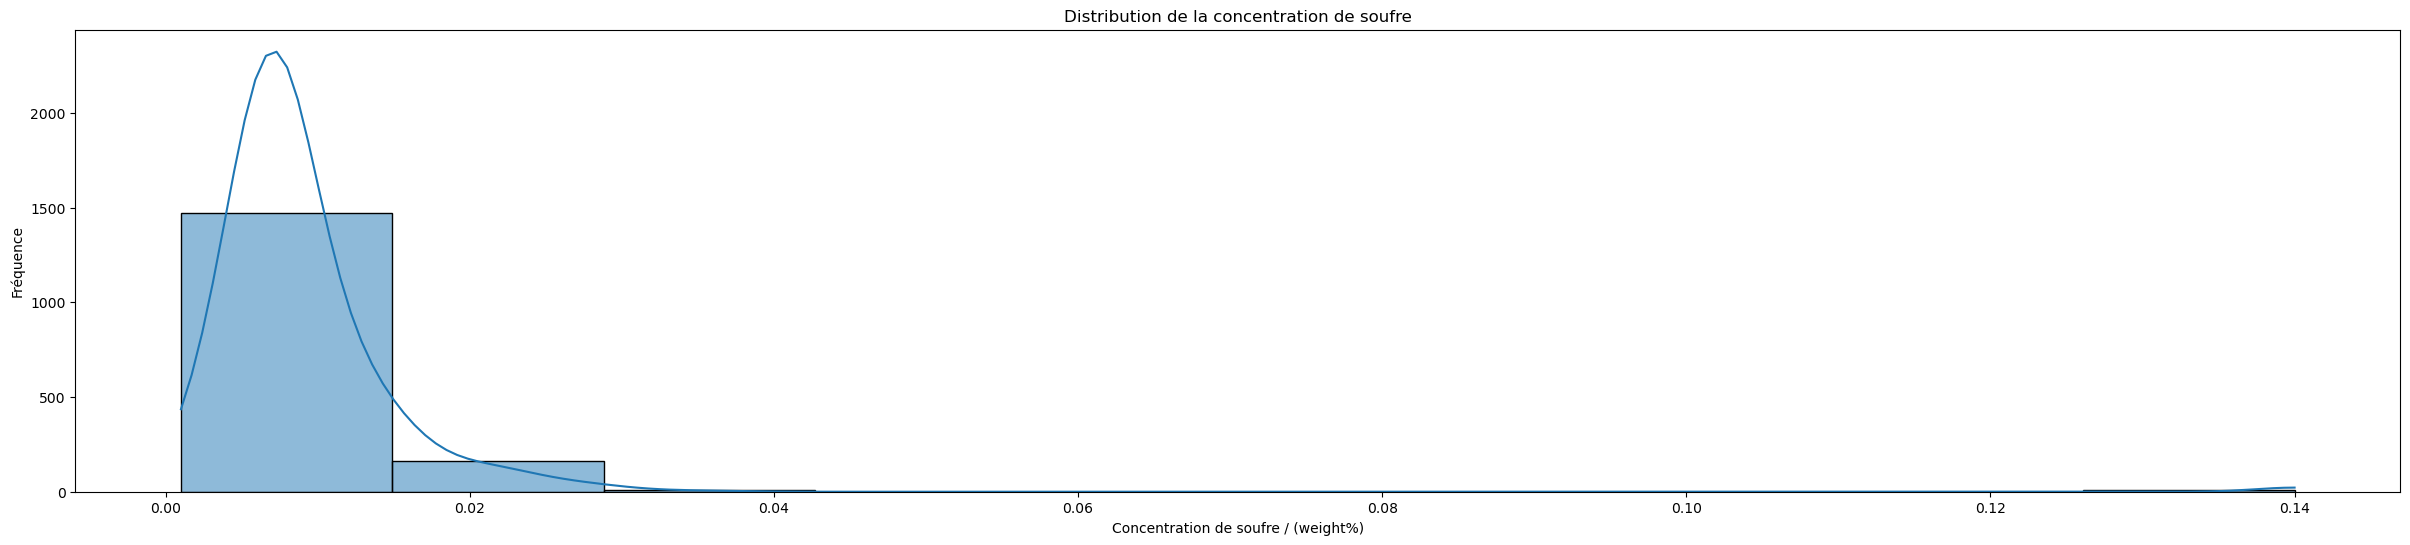

In [235]:
# Tracer le graphique de distribution
plt.figure(figsize=(30, 6))
sns.histplot(data['Sulphur concentration / (weight%)'], bins=10, kde=True)
plt.title('Distribution de la concentration de soufre')
plt.xlabel('Concentration de soufre / (weight%)')
plt.ylabel('Fréquence')
plt.show()

In [237]:
df['Sulphur concentration / (weight%)'].fillna(df['Sulphur concentration / (weight%)'].mean(), inplace=True)

C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\1020160495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sulphur concentration / (weight%)'].fillna(df['Sulphur concentration / (weight%)'].mean(), inplace=True)
C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\1020160495.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silen

### III.Missing values :  Phosphorus concentration / (weight%) ###

In [239]:
df['Phosphorus concentration / (weight%)'].describe()

count    1642.000000
mean        0.012952
std         0.019627
min         0.002000
25%         0.007000
50%         0.010000
75%         0.014000
max         0.250000
Name: Phosphorus concentration / (weight%), dtype: float64

In [240]:
df[df['Phosphorus concentration / (weight%)'].isnull()]

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID,Common_Prefix
1150,0.11,0.38,1.50,0.029000,NaN,NaN,NaN,0.0,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-26aw,Gar&K-1975-
1151,0.11,0.37,1.52,0.030000,NaN,NaN,NaN,0.0,0.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-27aw,Gar&K-1975-
1152,0.11,0.38,1.55,0.029000,NaN,NaN,NaN,0.0,0.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-28aw,Gar&K-1975-
1153,0.14,0.38,1.65,0.028000,NaN,NaN,NaN,0.5,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-29aw,Gar&K-1975-
1154,0.10,0.38,1.58,0.028000,NaN,NaN,NaN,0.5,0.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-30aw,Gar&K-1975-
1155,0.10,0.39,1.68,0.027000,NaN,NaN,NaN,0.5,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-31aw,Gar&K-1975-
1303,0.11,0.18,0.70,0.009529,NaN,0.13,2.28,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-hl,Natsume-1990-
1304,0.10,0.17,0.67,0.009529,NaN,0.14,2.31,0.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-hh,Natsume-1990-
1305,0.11,0.17,0.65,0.009529,NaN,0.02,2.28,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-ll,Natsume-1990-
1306,0.10,0.16,0.61,0.009529,NaN,0.02,2.27,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-lh,Natsume-1990-


In [241]:
m = df[df['Common_Prefix'] == 'Gar&K-1975-']['Phosphorus concentration / (weight%)'].mean()

In [243]:
# Fill NaN values with the mean in the original DataFrame
df.loc[df['Common_Prefix'] == 'Gar&K-1975-', 'Phosphorus concentration / (weight%)'] = df.loc[df['Common_Prefix'] == 'Gar&K-1975-', 'Phosphorus concentration / (weight%)'].fillna(m)

In [245]:
df['Phosphorus concentration / (weight%)'].fillna(df['Phosphorus concentration / (weight%)'].mean(), inplace=True)

C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\3189484787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phosphorus concentration / (weight%)'].fillna(df['Phosphorus concentration / (weight%)'].mean(), inplace=True)


### III.Missing values :  other concentrations / (weight%) ###

In [252]:
df['Nickel concentration / (weight%)'].fillna(df['Nickel concentration / (weight%)'].mean(), inplace=True)
df['Chromium concentration / (weight%)'].fillna(df['Chromium concentration / (weight%)'].mean(), inplace=True)
df['Molybdenum concentration / (weight%)'].fillna(df['Molybdenum concentration / (weight%)'].mean(), inplace=True)
df['Vanadium concentration / (weight%)'].fillna(df['Vanadium concentration / (weight%)'].mean(), inplace=True)
df['Copper concentration / (weight%)'].fillna(df['Copper concentration / (weight%)'].mean(), inplace=True)
df['Cobalt concentration / (weight%)'].fillna(df['Cobalt concentration / (weight%)'].mean(), inplace=True)
df['Tungsten concentration / (weight%)'].fillna(df['Tungsten concentration / (weight%)'].mean(), inplace=True)
df['Oxygen concentration / parts per million by weight'].fillna(df['Oxygen concentration / parts per million by weight'].mean(), inplace=True)
df['Titanium concentration / parts per million by weight'].fillna(df['Titanium concentration / parts per million by weight'].mean(), inplace=True)


C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\1851643774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Nickel concentration / (weight%)'].fillna(df['Nickel concentration / (weight%)'].mean(), inplace=True)
C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\1851643774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [253]:
df['Nitrogen concentration / parts per million by weight'].fillna(df['Nitrogen concentration / parts per million by weight'].mean(), inplace=True)
df['Aluminium concentration / parts per million by weight'].fillna(df['Aluminium concentration / parts per million by weight'].mean(), inplace=True)
df['Boron concentration / parts per million by weight'].fillna(df['Boron concentration / parts per million by weight'].mean(), inplace=True)
df['Niobium concentration / parts per million by weight'].fillna(df['Niobium concentration / parts per million by weight'].mean(), inplace=True)
df['Tin concentration / parts per million by weight'].fillna(df['Tin concentration / parts per million by weight'].mean(), inplace=True)
df['Arsenic concentration / parts per million by weight'].fillna(df['Arsenic concentration / parts per million by weight'].mean(), inplace=True)
df['Antimony concentration / parts per million by weight'].fillna(df['Antimony concentration / parts per million by weight'].mean(), inplace=True)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [366]:
# Convert to numeric, coercing errors to NaN
df['Nitrogen concentration / parts per million by weight'] = pd.to_numeric(df['Nitrogen concentration / parts per million by weight'], errors='coerce')

# Optionally, drop NaN values if you want to calculate the mean only for valid entries
mean_nitrogen_concentration = df['Nitrogen concentration / parts per million by weight'].mean()
print(mean_nitrogen_concentration)

113.37869822485207


In [368]:
df['Nitrogen concentration / parts per million by weight'].fillna(df['Nitrogen concentration / parts per million by weight'].mean(), inplace=True)
df['Aluminium concentration / parts per million by weight'].fillna(df['Aluminium concentration / parts per million by weight'].mean(), inplace=True)
df['Boron concentration / parts per million by weight'].fillna(df['Boron concentration / parts per million by weight'].mean(), inplace=True)
df['Niobium concentration / parts per million by weight'].fillna(df['Niobium concentration / parts per million by weight'].mean(), inplace=True)
df['Tin concentration / parts per million by weight'].fillna(df['Tin concentration / parts per million by weight'].mean(), inplace=True)
df['Arsenic concentration / parts per million by weight'].fillna(df['Arsenic concentration / parts per million by weight'].mean(), inplace=True)
df['Antimony concentration / parts per million by weight'].fillna(df['Antimony concentration / parts per million by weight'].mean(), inplace=True)

C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\3204121392.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Nitrogen concentration / parts per million by weight'].fillna(df['Nitrogen concentration / parts per million by weight'].mean(), inplace=True)
C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\3204121392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wo

### III.Missing values :  current & Voltage ###

In [258]:
df[df['Current / A'].isnull()]['Common_Prefix'].value_counts()

Common_Prefix
Evans           156
Cunh-1982-       38
EvHtIp1979-      32
Blond&-1984-     18
Sw&Rog-1973       4
Name: count, dtype: int64

In [260]:
evans_c=df[df['Common_Prefix']=='Evans']['Current / A'].mean()
evans_v=df[df['Common_Prefix']=='Evans']['Voltage / V'].mean()

In [262]:
# Fill NaN values with the mean in the original DataFrame
df.loc[df['Common_Prefix'] == 'Evans', 'Current / A'] = df.loc[df['Common_Prefix'] == 'Evans', 'Current / A'].fillna(evans_c)
df.loc[df['Common_Prefix'] == 'Evans', 'Voltage / V'] = df.loc[df['Common_Prefix'] == 'Evans', 'Voltage / V'].fillna(evans_v)

In [264]:
df['Current / A']= df['Current / A'].fillna(df['Current / A'].mean())
df['Voltage / V']= df['Voltage / V'].fillna(df['Voltage / V'].mean())

### III.Missing values :  AC or DC ###

In [267]:
df[df['AC or DC'].isnull()]['Common_Prefix'].value_counts()

Common_Prefix
Evans              156
Birmingham-MAX3      9
RC81033              4
p12-RR82011          2
p28-RR82011          2
p11-RR82011          2
p36-RR82011          2
p35-RR82011          2
p34-RR82011          2
p33-RR82011          2
p32-RR82011          2
p31-RR82011          2
p30-RR82011          2
p29-RR82011          2
p26-RR82011          2
p13-RR82011          2
p10-RR82011          2
p25-RR82011          2
p24-RR82011          2
p23-RR82011          2
p22-RR82011          2
p21-RR82011          2
p16-RR82011          2
p15-RR82011          2
p14-RR82011          2
p9-RR82011           2
Name: count, dtype: int64

In [269]:
df[df['Common_Prefix']=='Evans']['AC or DC'].value_counts()

AC or DC
DC    696
AC      4
Name: count, dtype: int64

In [271]:
df.loc[df['Common_Prefix'] == 'Evans', 'AC or DC'] = df.loc[df['Common_Prefix'] == 'Evans', 'AC or DC'].fillna('DC')

In [273]:
df['AC or DC']= df['AC or DC'].fillna('o')

### III.Missing values :  Electrode positive ou négative ###

In [276]:
df[df['Electrode positive or negative'].isnull()]['Common_Prefix'].value_counts()

Common_Prefix
Evans    156
Name: count, dtype: int64

In [278]:
df[df['Common_Prefix']=='Evans']['Electrode positive or negative'].value_counts()

Electrode positive or negative
+    696
0      4
Name: count, dtype: int64

In [280]:
df['Electrode positive or negative']= df['Electrode positive or negative'].fillna('+')

### III.Missing values :  Post weld heat treatment temperature / deg C et 

Post weld heat treatment time / hours  ###

In [283]:
df[df['Post weld heat treatment time / hours'].isnull()]['Common_Prefix'].value_counts()

Common_Prefix
Gar&K-1975-    13
Name: count, dtype: int64

In [285]:
df[df['Common_Prefix']=='Gar&K-1975-']['Post weld heat treatment temperature / deg C'].mean()

251.1627906976744

In [287]:
gark_t=df[df['Common_Prefix']=='Gar&K-1975-']['Post weld heat treatment temperature / deg C'].mean()
gark_time=df[df['Common_Prefix']=='Gar&K-1975-']['Post weld heat treatment time / hours'].mean()

In [289]:
df['Post weld heat treatment temperature / deg C']= df['Post weld heat treatment temperature / deg C'].fillna(gark_t)
df['Post weld heat treatment time / hours']= df['Post weld heat treatment time / hours'].fillna(gark_time)

### III.Missing values : Charpy   ###

In [292]:
df[df['Charpy impact toughness / J'].isnull()]['Common_Prefix'].value_counts()

Common_Prefix
Evans                      315
Gar&K-1975-                 56
PantK-1990-                 42
Cunh-1982-                  38
Wolst-1974-                 32
KocakP                      21
RaiterGonzal-Mo-1989-       18
PakSven-1990-               17
EvHtIp1979-                 16
Stil-TiB-1978-              16
Pat-1981-                   16
Hunt&-Di-1994-              16
SvenGret-1990-              16
Icici&-1992-                14
Blond&-1984-                12
EPRI-TR-101394s-E9          12
Es-Souni&-Cu/CMn-1990-      12
Ga&K-1975II-                10
Birmingham-MAX3              9
Mart-                        7
Alekseev&-CMnNi-1991-CH      7
Ditt-                        5
Natsume-1990-                4
RC81033                      4
Chandel&-1985W               4
Sw&Rog-1973                  4
p36-RR82011                  2
p35-RR82011                  2
p34-RR82011                  2
p25-RR82011                  2
p32-RR82011                  2
p31-RR82011              

In [294]:
evans_charpyJ=df[df['Common_Prefix']=='Evans']['Charpy impact toughness / J'].mean()
evanc_charpyC=df[df['Common_Prefix']=='Evans']['Charpy temperature / deg C'].mean()

In [359]:
evans_charpyJ

85.73382624768946

In [296]:
df.loc[df['Common_Prefix'] == 'Evans', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'Evans', 'Charpy impact toughness / J'].fillna(evans_charpyJ)
df.loc[df['Common_Prefix'] == 'Evans', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'Evans', 'Charpy temperature / deg C'].fillna(evanc_charpyC)

In [298]:
pant_charpyJ=df[df['Common_Prefix']=='PantK-1990-']['Charpy impact toughness / J'].mean()
pant_charpyC=df[df['Common_Prefix']=='PantK-1990-']['Charpy temperature / deg C'].mean()

In [300]:
df.loc[df['Common_Prefix'] == 'PantK-1990-', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'PantK-1990-', 'Charpy impact toughness / J'].fillna(pant_charpyJ)
df.loc[df['Common_Prefix'] == 'PantK-1990-', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'PantK-1990-', 'Charpy temperature / deg C'].fillna(pant_charpyC)

In [302]:
sven_charpyJ=df[df['Common_Prefix']=='SvenGret-1990-']['Charpy impact toughness / J'].mean()
sven_charpyC=df[df['Common_Prefix']=='SvenGret-1990-']['Charpy temperature / deg C'].mean()

In [304]:
df.loc[df['Common_Prefix'] == 'SvenGret-1990-', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'SvenGret-1990-', 'Charpy impact toughness / J'].fillna(sven_charpyJ)
df.loc[df['Common_Prefix'] == 'SvenGret-1990-', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'SvenGret-1990-', 'Charpy temperature / deg C'].fillna(sven_charpyC)

In [306]:
pat_charpyJ=df[df['Common_Prefix']=='Pat-1981-']['Charpy impact toughness / J'].mean()
pat_charpyC=df[df['Common_Prefix']=='Pat-1981-']['Charpy temperature / deg C'].mean()

In [308]:
df.loc[df['Common_Prefix'] == 'Pat-1981-', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'Pat-1981-', 'Charpy impact toughness / J'].fillna(pat_charpyJ)
df.loc[df['Common_Prefix'] == 'Pat-1981-', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'Pat-1981-', 'Charpy temperature / deg C'].fillna(pat_charpyC)

In [310]:
df[df['Common_Prefix']=='EvHtIp1979-']['Charpy impact toughness / J'].mean()

100.0

In [312]:
evht_charpyJ=df[df['Common_Prefix']=='EvHtIp1979-']['Charpy impact toughness / J'].mean()
evht_charpyC=df[df['Common_Prefix']=='EvHtIp1979-']['Charpy temperature / deg C'].mean()

In [314]:
df.loc[df['Common_Prefix'] == 'EvHtIp1979-', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'EvHtIp1979-', 'Charpy impact toughness / J'].fillna(evht_charpyJ)
df.loc[df['Common_Prefix'] == 'EvHtIp1979-', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'EvHtIp1979-', 'Charpy temperature / deg C'].fillna(evht_charpyC)

In [316]:
df[df['Common_Prefix']=='Icici&-1992-']['Charpy impact toughness / J'].mean()

51.8125

In [318]:
ici_charpyJ=df[df['Common_Prefix']=='Icici&-1992-']['Charpy impact toughness / J'].mean()
ici_charpyC=df[df['Common_Prefix']=='Icici&-1992-']['Charpy temperature / deg C'].mean()

In [320]:
df.loc[df['Common_Prefix'] == 'Icici&-1992-', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'Icici&-1992-', 'Charpy impact toughness / J'].fillna(ici_charpyJ)
df.loc[df['Common_Prefix'] == 'Icici&-1992-', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'Icici&-1992-', 'Charpy temperature / deg C'].fillna(ici_charpyC)

In [322]:
df[df['Common_Prefix']=='Blond&-1984-']['Charpy impact toughness / J'].mean()

69.0

In [324]:
bld_charpyJ=df[df['Common_Prefix']=='Blond&-1984-']['Charpy impact toughness / J'].mean()
bld_charpyC=df[df['Common_Prefix']=='Blond&-1984-']['Charpy temperature / deg C'].mean()

In [326]:
df.loc[df['Common_Prefix'] == 'Blond&-1984-', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'Blond&-1984-', 'Charpy impact toughness / J'].fillna(bld_charpyJ)
df.loc[df['Common_Prefix'] == 'Blond&-1984-', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'Blond&-1984-', 'Charpy temperature / deg C'].fillna(bld_charpyC)

In [328]:
df[df['Common_Prefix']=='Mart-']['Charpy impact toughness / J'].mean()

66.66666666666667

In [330]:
mrt_charpyJ=df[df['Common_Prefix']=='Mart-']['Charpy impact toughness / J'].mean()
mrt_charpyC=df[df['Common_Prefix']=='Mart-']['Charpy temperature / deg C'].mean()

In [332]:
df.loc[df['Common_Prefix'] == 'Mart-', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'Mart-', 'Charpy impact toughness / J'].fillna(mrt_charpyJ)
df.loc[df['Common_Prefix'] == 'Mart-', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'Mart-', 'Charpy temperature / deg C'].fillna(mrt_charpyC)

In [334]:
df[df['Common_Prefix']=='Ditt-']['Charpy impact toughness / J'].mean()

190.33333333333334

In [335]:
ditt_charpyJ=df[df['Common_Prefix']=='Ditt-']['Charpy impact toughness / J'].mean()
ditt_charpyC=df[df['Common_Prefix']=='Ditt-']['Charpy temperature / deg C'].mean()

In [338]:
df.loc[df['Common_Prefix'] == 'Ditt-', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'Ditt-', 'Charpy impact toughness / J'].fillna(ditt_charpyJ)
df.loc[df['Common_Prefix'] == 'Ditt-', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'Ditt-', 'Charpy temperature / deg C'].fillna(ditt_charpyC)

In [340]:
df[df['Common_Prefix']=='Chandel&-1985W']['Charpy impact toughness / J'].mean()

115.84210526315789

In [342]:
chdl_charpyJ=df[df['Common_Prefix']=='Chandel&-1985W']['Charpy impact toughness / J'].mean()
chdl_charpyC=df[df['Common_Prefix']=='Chandel&-1985W']['Charpy temperature / deg C'].mean()

In [344]:
df.loc[df['Common_Prefix'] == 'Chandel&-1985W', 'Charpy impact toughness / J'] = df.loc[df['Common_Prefix'] == 'Chandel&-1985W', 'Charpy impact toughness / J'].fillna(chdl_charpyJ)
df.loc[df['Common_Prefix'] == 'Chandel&-1985W', 'Charpy temperature / deg C'] = df.loc[df['Common_Prefix'] == 'Chandel&-1985W', 'Charpy temperature / deg C'].fillna(chdl_charpyC)

In [346]:
df['Charpy impact toughness / J'] = df['Charpy impact toughness / J'].fillna(df['Charpy impact toughness / J'].mean())
df['Charpy temperature / deg C'] = df['Charpy temperature / deg C'].fillna(df['Charpy temperature / deg C'].mean())

### III. Missing Values: features to delete ###

In [349]:
#50 % FATT                                                1621
#Primary ferrite in microstructure / %                    1554
#Ferrite with second phase / %                            1562
#Acicular ferrite / %                                     1562
#Martensite / %                                           1563
#Ferrite with carbide aggregate / %                       1563

In [351]:
df = df.drop(columns=['50 % FATT', 'Primary ferrite in microstructure / %', 'Ferrite with second phase / %', 'Acicular ferrite / %','Martensite / %','Ferrite with carbide aggregate / %'])

In [353]:
df

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Post weld heat treatment time / hours,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy temperature / deg C,Charpy impact toughness / J,Hardness / kg/mm2,Weld ID,Common_Prefix
0,0.037,0.30,0.65,0.008,0.012,0.00,2.101273,0.479172,0.097379,0.172163,...,14.0,392.0,466.0,31.9,80.6,-45.136784,85.733826,NaN,Evans-Ni/CMn-1990/1991-0Aaw,Evans
1,0.037,0.30,0.65,0.008,0.012,0.00,2.101273,0.479172,0.097379,0.172163,...,0.0,NaN,NaN,NaN,NaN,-28.000000,100.000000,NaN,Evans-Ni/CMn-1990/1991-0Aawch,Evans
2,0.037,0.30,0.65,0.008,0.012,0.00,2.101273,0.479172,0.097379,0.172163,...,2.0,370.0,456.0,35.2,80.6,-38.000000,100.000000,NaN,Evans-Ni/CMn-1990/1991-0Aht,Evans
3,0.037,0.31,1.03,0.007,0.014,0.00,2.101273,0.479172,0.097379,0.172163,...,14.0,413.0,498.0,31.2,80.6,-45.136784,85.733826,NaN,Evans-Ni/CMn-1990/1991-0Baw,Evans
4,0.037,0.31,1.03,0.007,0.014,0.00,2.101273,0.479172,0.097379,0.172163,...,0.0,NaN,NaN,NaN,NaN,-48.000000,100.000000,NaN,Evans-Ni/CMn-1990/1991-0Bawch,Evans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.600000,0.980000,0.180000,0.172163,...,2.0,834.0,NaN,NaN,NaN,-35.008558,85.892497,NaN,Birmingham-MAX35,Birmingham-MAX3
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.400000,0.940000,0.190000,0.172163,...,2.0,822.0,NaN,NaN,NaN,-35.008558,85.892497,NaN,Birmingham-MAX36,Birmingham-MAX3
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.200000,0.940000,0.020000,0.172163,...,2.0,660.0,NaN,NaN,NaN,-35.008558,85.892497,NaN,Birmingham-MAX37,Birmingham-MAX3
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.400000,0.970000,0.170000,0.172163,...,2.0,832.0,NaN,NaN,NaN,-35.008558,85.892497,NaN,Birmingham-MAX38,Birmingham-MAX3


### III.Missing values: Résumé ###

In [370]:
df.isnull().sum()

Carbon concentration / (weight%)                            0
Silicon concentration / (weight%)                           0
Manganese concentration / (weight%)                         0
Sulphur concentration / (weight%)                           0
Phosphorus concentration / (weight%)                        0
Nickel concentration / (weight%)                            0
Chromium concentration / (weight%)                          0
Molybdenum concentration / (weight%)                        0
Vanadium concentration / (weight%)                          0
Copper concentration / (weight%)                            0
Cobalt concentration / (weight%)                            0
Tungsten concentration / (weight%)                          0
Oxygen concentration / parts per million by weight          0
Titanium concentration / parts per million by weight        0
Nitrogen concentration / parts per million by weight        0
Aluminium concentration / parts per million by weight       0
Boron co

# Les variables cibles : 

- **Yield strength** / MPa
- **Ultimate tensile strength** / MPa
- **Elongation** / %
- **Reduction of Area** / %
- **Hardness** / kg/mm²


## IV. Variables Catégoriques ##

### IV. Variables Catégoriques : Introduction

In [395]:
df.columns

Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per millio

In [397]:
#  'AC or DC'
# 'Electrode positive or negative'
# 'Type of weld'
# Sont des variables catégoriques

### IV. Variables Catégoriques : AC or DC

In [404]:
df['AC or DC'].value_counts()

AC or DC
DC    1551
o       59
AC      42
Name: count, dtype: int64

In [406]:
df_encoded_1 = pd.get_dummies(df, columns=['AC or DC'])

In [410]:
df_encoded_1.columns

Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per millio

In [412]:
df_encoded_1.drop(columns=['AC or DC_o'],inplace=True)

### IV. Variables Catégoriques : 'Electrode positive or negative'

In [421]:
df['Electrode positive or negative'].value_counts()

Electrode positive or negative
+    1607
0      38
-       7
Name: count, dtype: int64

In [423]:
df_encoded_2 = pd.get_dummies(df_encoded_1, columns=['Electrode positive or negative'])

In [425]:
df_encoded_2.columns

Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per millio

In [427]:
df_encoded_2.drop(columns=['Electrode positive or negative_-'],inplace=True)

### IV. Variables Catégoriques : 'Type of Weld'

In [431]:
df['Type of weld'].value_counts()

Type of weld
MMA      1140
SA        261
FCA        87
TSA        87
ShMA       40
NGSAW      18
NGGMA       7
SAA         4
GTAA        4
GMAA        4
Name: count, dtype: int64

In [435]:
df_encoded = pd.get_dummies(df_encoded_2, columns=['Type of weld'])

In [437]:
df_encoded.columns

Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per millio

In [439]:
df_encoded.drop(columns=['Type of weld_GMAA'],inplace=True)

## V. Analyse des composantes principales: ACP

### V. ACP : drop les variables cibles

In [480]:
df_encoded.columns

Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per millio

In [482]:
X=df_encoded[['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per million by weight',
       'Antimony concentration / parts per million by weight', 'Current / A',
       'Voltage / V', 'Heat input / kJ/mm', 'Interpass temperature / deg C',
       'Post weld heat treatment temperature / deg C',
       'Post weld heat treatment time / hours' , 'Charpy temperature / deg C',
       'Charpy impact toughness / J',
        'AC or DC_AC', 'AC or DC_DC',
       'Electrode positive or negative_+', 'Electrode positive or negative_0',
       'Type of weld_FCA', 'Type of weld_GTAA', 'Type of weld_MMA',
       'Type of weld_NGGMA', 'Type of weld_NGSAW', 'Type of weld_SA',
       'Type of weld_SAA', 'Type of weld_ShMA', 'Type of weld_TSA']]

In [484]:
y=df_encoded[['Yield strength / MPa',
       'Ultimate tensile strength / MPa', 'Elongation / %',
       'Reduction of Area / %','Hardness / kg/mm2']]

### V. ACP : standardisation

In [499]:
def replace_range_with_avg(value):
    if isinstance(value, str) and '-' in value:
        try:
            # Séparer les deux nombres et calculer la moyenne
            numbers = list(map(float, value.split('-')))
            return sum(numbers) / len(numbers)
        except ValueError:
            return value  # Si ce n'est pas un format attendu, garder la valeur originale
    else:
        return value  # Si ce n'est pas une chaîne au format '150-200', garder la valeur originale

# Appliquer la fonction sur toutes les colonnes du DataFrame
X = X.applymap(replace_range_with_avg)


C:\Users\DF6610\AppData\Local\Temp\ipykernel_17936\92468369.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(replace_range_with_avg)


In [501]:
# Standardisation des données (important pour la PCA)
scaler = StandardScaler()
X_scaled_28 = scaler.fit_transform(X[['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per million by weight',
       'Antimony concentration / parts per million by weight', 'Current / A',
       'Voltage / V', 'Heat input / kJ/mm', 'Interpass temperature / deg C',
       'Post weld heat treatment temperature / deg C',
       'Post weld heat treatment time / hours' , 'Charpy temperature / deg C',
       'Charpy impact toughness / J']])

In [503]:
X[['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per million by weight',
       'Antimony concentration / parts per million by weight', 'Current / A',
       'Voltage / V', 'Heat input / kJ/mm', 'Interpass temperature / deg C',
       'Post weld heat treatment temperature / deg C',
       'Post weld heat treatment time / hours' , 'Charpy temperature / deg C',
       'Charpy impact toughness / J']]=X_scaled_28

### V. ACP : Choix du nombre de composants

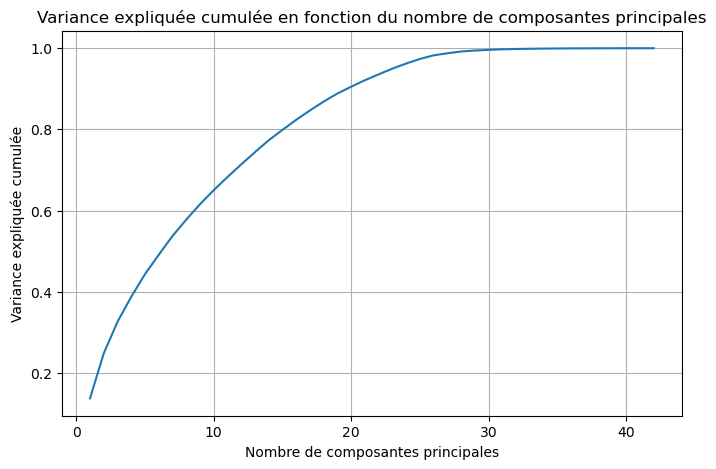

In [517]:
# Appliquer la PCA
pca = PCA()  # Laisser scikit-learn décider du nombre maximal de composantes
pca.fit(X)

# Variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Calcul de la variance cumulée
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Tracer le graphe
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='', linestyle='-')
plt.title('Variance expliquée cumulée en fonction du nombre de composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.show()

In [519]:
# 25 composantes peut expliquer plus de 90% des données

### V. ACP

In [533]:
# Appliquer la PCA
pca = PCA(n_components=25)  # Laisser scikit-learn décider du nombre maximal de composantes
pca.fit(X)
pca_result = pca.transform(X)
# Créer un DataFrame pour les résultats de la PCA
pca_X = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 
 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25'])

# Afficher les résultats
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.895216,-1.198773,-0.893008,-0.291154,0.034345,-0.114679,0.136251,-0.923136,0.427305,0.573889,...,-0.328614,0.134657,-1.485148,0.238863,0.276459,-0.270014,-0.814854,-0.441799,0.249353,-0.207611
1,0.281633,-0.994532,-0.137709,0.402642,-0.026909,0.454594,0.719804,-0.571196,0.574406,0.079231,...,-1.506557,0.602652,-1.215855,0.692596,0.204618,-0.408751,0.049314,-0.357384,0.159812,-0.324048
2,0.974867,-0.898349,-0.419630,0.055003,-0.093927,0.387623,0.144405,-0.906910,0.564509,0.071407,...,-1.051386,0.547391,-0.623551,0.670157,-0.160712,-0.424799,-0.649649,0.448896,0.113586,0.613911
3,0.713434,-1.227031,-0.769406,-0.024877,0.139356,-0.139951,0.111077,-0.568973,0.346216,0.716107,...,0.116841,0.058321,-1.062440,0.307603,0.159934,-0.351041,-0.976014,-0.438794,0.224565,-0.224572
4,-0.001110,-1.192933,-0.079451,0.592768,0.184898,0.088510,0.527296,-0.073414,0.498996,0.131013,...,-1.130706,0.670413,-0.754378,0.875372,0.064850,-0.361980,-0.345920,-0.387461,0.317085,-0.137217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,2.791913,2.180753,1.572569,-0.249894,-0.146425,-0.073557,-0.973909,0.486723,-0.349858,-0.978021,...,-0.717910,-0.937931,0.306316,0.050228,-0.499128,0.556604,-0.922980,2.163893,1.510112,-1.675909
1648,4.499640,3.116102,3.349305,0.354559,-0.073092,-0.354718,-0.216728,0.350004,-0.640649,-1.345642,...,-0.701155,-1.969019,-0.838949,-0.680449,-0.623851,-0.782092,-0.965949,-0.899811,1.312553,2.110635
1649,1.450902,1.500943,0.705793,-0.303715,-0.733231,0.102597,-0.967380,-0.284758,-0.190800,-0.510442,...,-0.906957,-0.276922,0.543399,0.611636,0.090415,0.399574,-0.785253,1.423495,-0.796180,-0.686701
1650,2.381523,1.928890,1.700214,-0.042225,-0.644980,-0.082207,-0.532694,-0.101569,-0.723256,-0.719198,...,-0.743905,-0.978392,0.263582,-0.010065,0.019528,-0.072696,-0.602975,0.025364,-0.900974,1.014271


In [530]:
print("Variance expliquée cumulée par chaque composante :", pca.explained_variance_ratio_.sum())

Variance expliquée cumulée par chaque composante : 0.9735995227962446
